In [203]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [204]:
df = pd.read_csv("pump_speeds.csv")

In [205]:
df = df[df["pump1_rpm"] > 0 ]

In [206]:
x = df["pump1_rpm"].values
y = df["pump1_outflow"].values


In [207]:
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial

basis_function = Polynomial(degree=1)

model = FROLS(
order_selection=False,
n_terms=5,
extended_least_squares=False,
ylag=2,
xlag=2,
estimator="least_squares",
basis_function=basis_function,
)
model.fit(X=x.reshape(-1,1), y=y.reshape(-1,1))


In [208]:
yhat = model.predict(X=x.reshape(-1,1), y=y.reshape(-1,1))

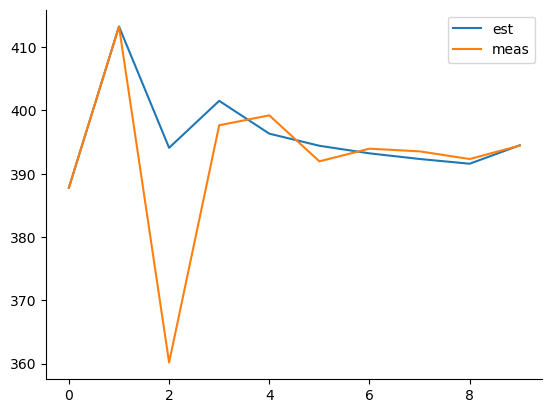

In [213]:
plt.plot(yhat[:10], label="est")
plt.plot(y[:10], label="meas")
plt.legend()

In [210]:
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import (
    compute_residues_autocorrelation,
    compute_cross_correlation,
)

In [211]:
sysidentpy_model_results = pd.DataFrame(
    results(
        model.final_model,
        model.theta,
        model.err,
        model.n_terms,
        err_precision=2,
        dtype="dec",
    ),
    columns=["Regressors", "Parameters", "ERR"],
).set_index("Regressors").sort_index()

In [212]:
sysidentpy_model_results

,Parameters,ERR
Regressors,,
1,-8.7587,0.00
x1(k-1),-0.0015,0.00
x1(k-2),0.2384,1.00
y(k-1),-0.0533,0.00
y(k-2),0.2513,0.00
